In [1]:
import os, sys
parent = os.path.abspath('..')

if not parent in sys.path: sys.path.append(parent)

from src.pairings import *
from src.bradley_terry.bradley_terry import BradleyTerry
import matplotlib.pyplot as plt

plt.style.use('_mpl-gallery')


## How fast does the number of strongly connected components decreases?

### Method 1: biggest components first

In [7]:
vote1 = BradleyTerry(500, 20000, CCBiggest, rematch=1, p=0.9)

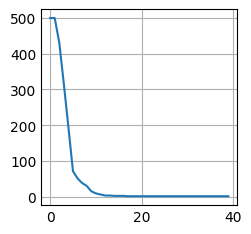

In [8]:
plt.plot(vote1.comparisons._nb_components_memo)
plt.show()

In [9]:
vote1.comparisons._nb_components_memo.index(1) * 500

8500

**Conclusion** 

It takes at least 8k votes with this method to get to a strongly connected graph.

### Method 2: cycle around the components

In [11]:
vote2 = BradleyTerry(500, 20000, CCZip, rematch=1, p=0.9)

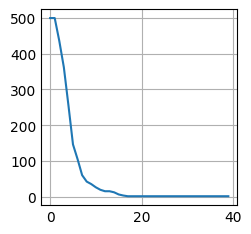

In [12]:
plt.plot(vote2.comparisons._nb_components_memo)
plt.show()

In [13]:
vote2.comparisons._nb_components_memo.index(1) * 500

8500

### Method 3 (Slow): Recompute at each iteration

In [2]:
vote3 = BradleyTerry(500, 20000, CCSlow, rematch=1, p=0.9)

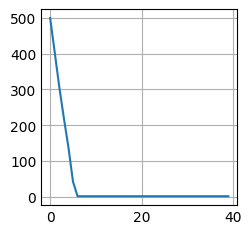

In [3]:
plt.plot(vote3.comparisons._nb_components_memo)
plt.show()

In [4]:
vote3.comparisons._nb_components_memo.index(1) * 500

3000

**Conclusion** 

It takes at least 3k votes with this method to get to a strongly connected graph.<br>
Note: the resulting graph is not regular

In [5]:
nx.is_regular(vote3.comparisons.graph)

False

### Comparison

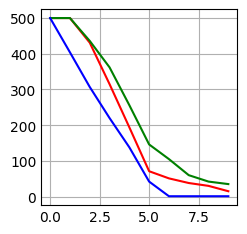

In [16]:
plt.plot(vote1.comparisons._nb_components_memo[:10], 'r')
plt.plot(vote2.comparisons._nb_components_memo[:10], 'g')
plt.plot(vote3.comparisons._nb_components_memo[:10], 'b')
plt.show()